# Multilayer Neural Networks with TensorFlow
## Using the MNIST dataset (...again!)


### Review: Neurons, Perceptrons, Logistic Regression...
They're all the same thing! Neural networks are essentially a fully-connected* network of units commonly reffered to as the perceptron. It performs logistic regression as we've learned it in the previous workshop, and looks a little something like this:
<img src = perceptron.png>
note: just realized we're using collab so you won't be able to see the images... just look up plz

In particular, note that the inputs are each multiplied by as respective weights to give a weighted sum. In our implementation, we will have an additional bias term added to the sum as well. Biases are important in helping learn the optimal mapping function -- if we don't have the bias term, we limit the function to pass through the origin.

In addition, the step function in the image is what we have been referring to as the activation function. The weighted sum is passed through the activation function which gives us our final output.

This can be expressed in the following equation:

\begin{equation*}
h(x) = a(Wx + b)
\end{equation*}

where $a$ is the activation function, $W$ is the weight vector, $x$ is the input vector, and $b$ is the bias term.

### Review: Activation functions and the activation layer
Sigmoid 
<img src = sigmoid.png>
Tanh
<img src = tanh.png>
ReLu
<img src = relu.jpeg>

Recall our discussion of activation functions (sigmoid, tanh, relu, softmax, etc...). Before, our models used them to give us a classification for a specific input. In neural networks, the gain a second use by providing **nonlinearity** after every hidden layer. 

From last workshop, we discussed the **universal approximation theorem**, which states that a sufficient number of nonlinear hidden units can approximate any continuous function. The nonlinearity from the activation functions allow us to accomplish just that with neural networks. 

Going back to the first usage of the activation function -- classification, we look at the **softmax function**. The softmax function is a generalization of the sigmoid function. The sigmoid function is useful for a 2-class classifier. In the classic example of classifying tumors, the sigmoid function will give us a 1 or a 0 for a malignant or beign tumor -- 2 classes! For use with the MNIST dataset, we are classifying an image as a number from 0-9, so we need 10 classes. 
Here's a visual for softmax: 
<img src = softmax.png>
We can intepret the final output vector as the probability of the input data being in a particular class. They add up to 1.

In [1]:
# Standard imports from last workshop
import tensorflow as tf
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Hyperparameters and our architecture

These can be thought of as variables that "tune" our models. These parameters define the overall architecture of the neural network. Picking the right hyperparameters is tricky and there's no theoretical "best" (although efforts have been made to find some, such as Google's AutoML).

This is the architecture that we want to implement:
<img src = hiddenlayers.gif>

In [2]:
# Define hyperameters
learning_rate = 0.1
num_epochs = 5000
batch_size = 100

hidden_units1 = 100
hidden_units2 = 35

In [3]:
# Define the data placeholders
x = tf.placeholder(tf.float32, shape = [None, 784])
y_ = tf.placeholder(tf.float32, shape = [None, 10])

In [4]:
# Define the hidden layers

# input -> hidden layer 1
W1 = tf.Variable(tf.truncated_normal([784, hidden_units1], stddev=0.1))
B1 = tf.Variable(tf.constant(0.1), [hidden_units1])

# hidden layer 1 -> hidden layer 2
W2 = tf.Variable(tf.truncated_normal([hidden_units1, hidden_units2], stddev=0.1))
B2 = tf.Variable(tf.constant(0.1), [hidden_units2])

# hidden layer 2 -> output layer
W3 = tf.Variable(tf.truncated_normal([hidden_units2, 10], stddev=0.1))
B3 = tf.Variable(tf.constant(0.1), [10])

# hidden layer 1 output
H1 = tf.nn.relu(tf.matmul(x, W1) + B1)

# hidden layer 2 output
H2 = tf.nn.relu(tf.matmul(H1, W2) + B2)

# output layer output (before softmax)
logits = tf.matmul(H2, W3) + B3

In [5]:
# Loss Function and Optimizer
cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = logits))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy_loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [6]:
# Track accuracy as network trains
correct_predictions = tf.equal(tf.argmax(logits, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [9]:
# Let's run our model!
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [10]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_epochs):
        x_batch, y_batch = mnist.train.next_batch(batch_size)
        optimizer.run(feed_dict = {x: x_batch, y_: y_batch})
        if i % 100 == 0:
            acc = accuracy.eval(feed_dict = {x: x_batch, y_: y_batch})
            loss = cross_entropy_loss.eval(feed_dict = {x: x_batch, y_: y_batch})
            print("Epoch: {}, accuracy: {}, loss: {}".format(i, acc, loss))

    acc = accuracy.eval(feed_dict = {x: mnist.test.images, y_:mnist.test.labels})
    print("Test accuracy: {}".format(acc))
    saver.save(sess, "./saved_model.ckpt")

Epoch: 0, accuracy: 0.07999999821186066, loss: 2.315173387527466
Epoch: 100, accuracy: 0.8100000023841858, loss: 0.5715774297714233
Epoch: 200, accuracy: 0.8799999952316284, loss: 0.34373968839645386
Epoch: 300, accuracy: 0.9300000071525574, loss: 0.2922646701335907
Epoch: 400, accuracy: 0.949999988079071, loss: 0.20340067148208618
Epoch: 500, accuracy: 0.9300000071525574, loss: 0.16611561179161072
Epoch: 600, accuracy: 0.9100000262260437, loss: 0.31956732273101807
Epoch: 700, accuracy: 0.9399999976158142, loss: 0.23325757682323456
Epoch: 800, accuracy: 0.9700000286102295, loss: 0.1364556849002838
Epoch: 900, accuracy: 0.9700000286102295, loss: 0.12986372411251068
Epoch: 1000, accuracy: 0.949999988079071, loss: 0.18613767623901367
Epoch: 1100, accuracy: 0.9399999976158142, loss: 0.14696234464645386
Epoch: 1200, accuracy: 0.9800000190734863, loss: 0.0713401734828949
Epoch: 1300, accuracy: 0.9399999976158142, loss: 0.20980936288833618
Epoch: 1400, accuracy: 0.949999988079071, loss: 0.127

INFO:tensorflow:Restoring parameters from ./saved_model.ckpt
0.972


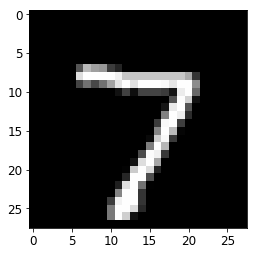

Predition:  7
Actual label:  7


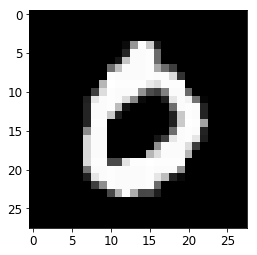

Predition:  0
Actual label:  0


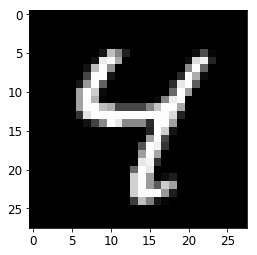

Predition:  4
Actual label:  4


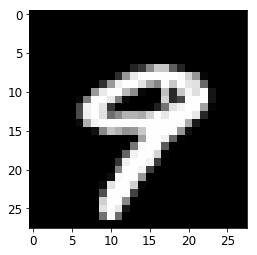

Predition:  9
Actual label:  9


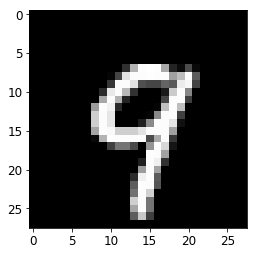

Predition:  9
Actual label:  9


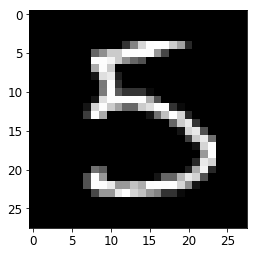

Predition:  5
Actual label:  5


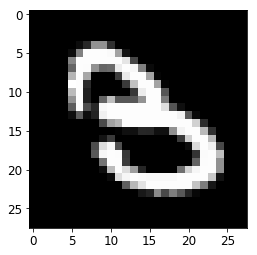

Predition:  3
Actual label:  3


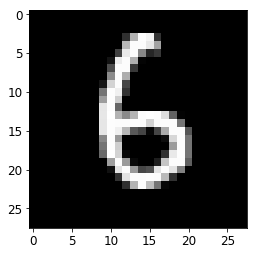

Predition:  6
Actual label:  6


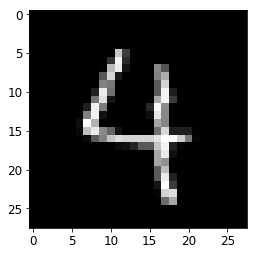

Predition:  4
Actual label:  4


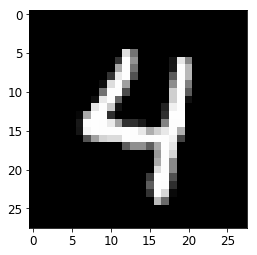

Predition:  4
Actual label:  4


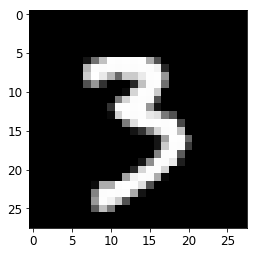

Predition:  3
Actual label:  3


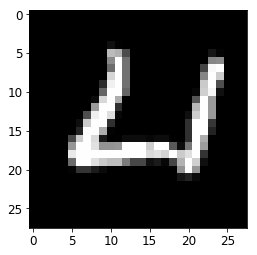

Predition:  4
Actual label:  4


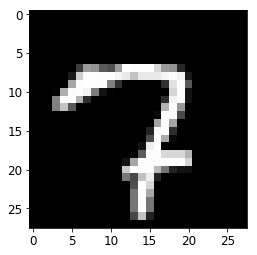

Predition:  7
Actual label:  7


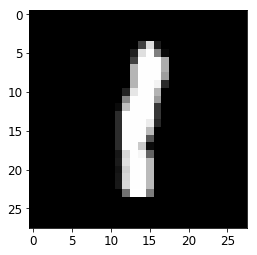

Predition:  1
Actual label:  1


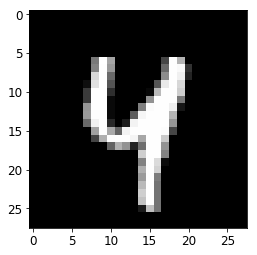

Predition:  4
Actual label:  4


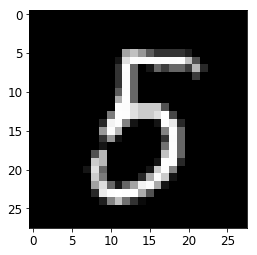

Predition:  5
Actual label:  5


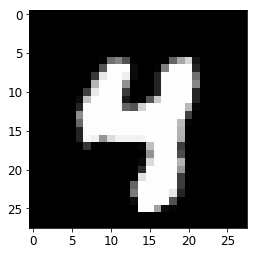

Predition:  4
Actual label:  4


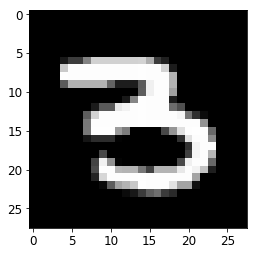

Predition:  3
Actual label:  3


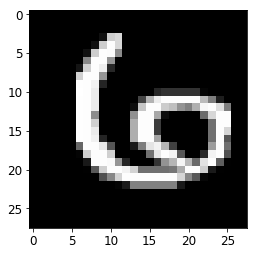

Predition:  6
Actual label:  6


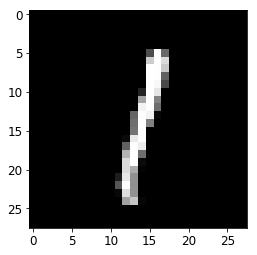

Predition:  1
Actual label:  1


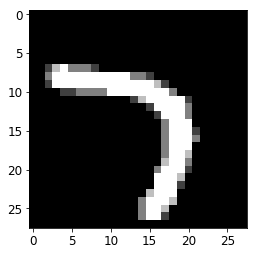

Predition:  7
Actual label:  7


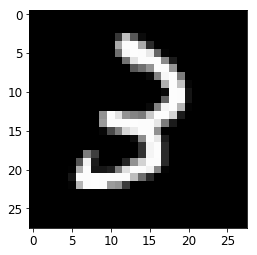

Predition:  3
Actual label:  3


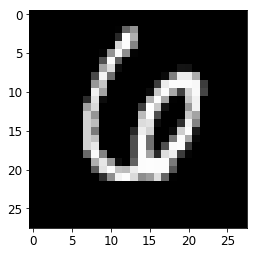

Predition:  6
Actual label:  6


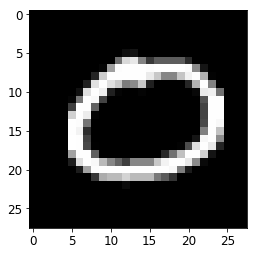

Predition:  0
Actual label:  0


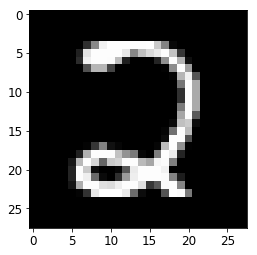

Predition:  2
Actual label:  2


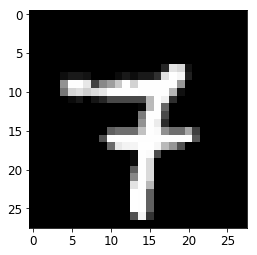

Predition:  7
Actual label:  7


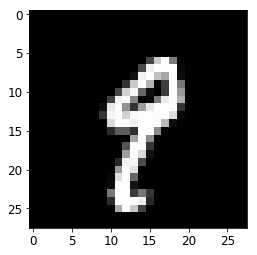

Predition:  9
Actual label:  9


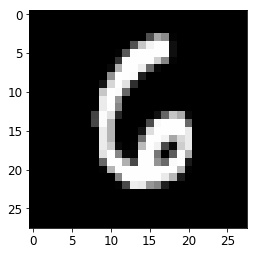

Predition:  6
Actual label:  6


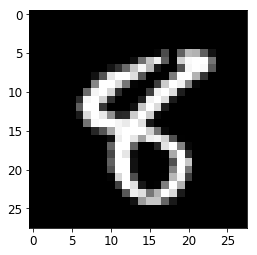

Predition:  8
Actual label:  8


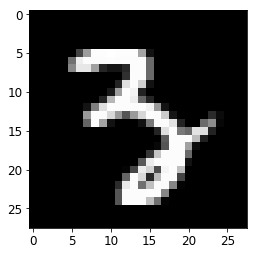

Predition:  3
Actual label:  3


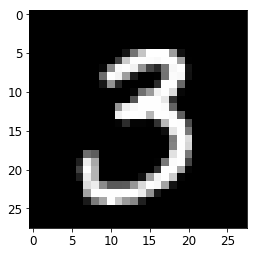

Predition:  3
Actual label:  3


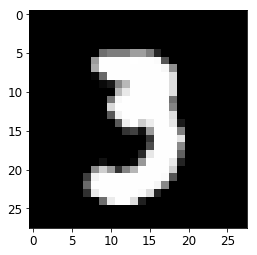

Predition:  3
Actual label:  3


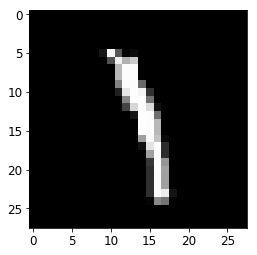

Predition:  1
Actual label:  1


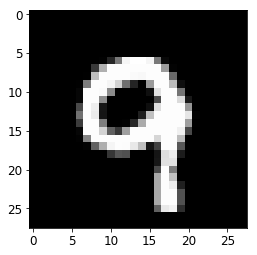

Predition:  9
Actual label:  9


In [14]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    return plt

with tf.Session() as sess:
    saver.restore(sess, "./saved_model.ckpt")
    X_new_scaled = mnist.test.images
    z = logits.eval(feed_dict={x: X_new_scaled})
    y_pred = np.argmax(z, axis=1)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    for i in range(100):
        if i%3 == 0:
            gen_image(mnist.test.images[i]).show()
            print("Predition: ", y_pred[i])
            print("Actual label: ", np.argmax(mnist.test.labels[i]))